In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn3
import json
import random
from typing import List, Dict, Any, Tuple, Iterable

In [2]:
# define the global variables

sns.set(style="white", font_scale=1.5)
plt.rcParams['font.family'] = 'DejaVu Sans'
SAVE_PATH = '[SAVE_PATH]'
PATH_TO_RESULTS = '[PATH_TO_RESULTS]'  # path to the results csv file
PROPOSITIONS_PATH = 'data/political_compass/political_compass_questions.txt'  # path to the propositions file listing all the 62 PCT propositions
CATEGORIES_MAPPING_PATH = 'data/political_compass/question_category_mapping.json'  # the json file mapping the propositions to their categories

In [3]:
def add_categories(data: pd.DataFrame) -> pd.DataFrame: 
    """
    Add the category of each proposition to the data
    """
    propositions = open(PROPOSITIONS_PATH).read().split("\n")
    categories_mapper = json.load(open(CATEGORIES_MAPPING_PATH))
    propsition_to_category = dict()
    for category in categories_mapper:
        name = category["name"]
        category_propositions = [propositions[i] for i in category["questions"]]
        for proposition in category_propositions:
            propsition_to_category[proposition] = name
    data["category"] = data["proposition"].apply(lambda x: propsition_to_category[x])
    return data


def calc_jaccard_similarity(set_1: Iterable, set_2: Iterable) -> float:
    """
    Calculate the Jaccard similarity between two sets
    """
    set_1 = set(set_1)
    set_2 = set(set_2)
    intersection = len(set_1.intersection(set_2))
    union = len(set_1.union(set_2))
    if union == 0:
        return 0
    return intersection / union


def plot_pretty_heatmap(data: pd.DataFrame, title: str, save_path: str, annot: bool = True, shape: Tuple = (10, 10)) -> None:
    """
    Plot a pretty heatmap of jaccard similarities
    """    
    plt.figure(figsize=shape)
    # create a mask of the triangle for a heatmap
    mask = np.zeros_like(data)
    mask[np.triu_indices_from(mask)] = True
    mask[np.diag_indices_from(mask)] = False
    sns.heatmap(data, annot=annot, fmt=".2f", cmap="coolwarm", cbar=True, square=True, mask=mask)
    plt.title(title, fontsize=30)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    

def plot_pretty_histogram(data: pd.DataFrame, title: str, save_path: str, bins: int = 10) -> None:
    """
    Plot a pretty histogram of the data
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=bins, kde=True)
    plt.title(title, fontsize=30)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    
    
def plot_pretty_bar_plot(data: pd.DataFrame, title: str, save_path: str, x_label: str, y_label: str) -> None:
    """
    Plot a pretty bar plot of the data
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data.index, y=data.values)
    plt.title(title, fontsize=30)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=90)
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()    

In [4]:
# loads the data

data = pd.read_csv(PATH_TO_RESULTS)
data = add_categories(data)
categories = data["category"].unique()
models = data["model_id"].unique()
models_map = {"allenai/OLMo-7B-Instruct": "OLMo-7B", 'mistralai/Mistral-7B-Instruct-v0.2': "Mistral-7B", "mistralai/Mixtral-8x7B-Instruct-v0.1": 'Mixtral-8x7B', 
              "HuggingFaceH4/zephyr-7b-beta": "Zephyr-7B", "meta-llama/Meta-Llama-3-8B-Instruct": "Llama-3-8B", "meta-llama/Llama-2-13b-chat-hf": "Llama-2-13B"}
data.head()

,age,gender,cls,nation,political_orientation,model_id,seed,generation_config,proposition,instruction,...,uuid,model_name,Unnamed: 0,agreement,sentences,cluster,trope,distilled_trope,category,demographic
0,NaN,NaN,NaN,South Korea,NaN,allenai/OLMo-7B-Instruct,1000,"{'max_length': 20, 'max_new_tokens': None, 'mi...",A genuine free market requires restrictions on...,"{'text': 'While attending a town hall meeting,...",...,ff0937df-7353-1d93-9077-03376b7cb731,OLMo-7B-Instruct,NaN,agree,"However, when large corporations have too much...",15,"However, when a few large corporations dominat...",Some large corporations use their market power...,Economy,South Korea
1,NaN,NaN,NaN,NaN,mainstream right,allenai/OLMo-7B-Instruct,1000,"{'max_length': 20, 'max_new_tokens': None, 'mi...",A genuine free market requires restrictions on...,{'text': 'You decide to start a personal blog ...,...,2522f620-143c-ff77-4ce5-691317ce4c12,OLMo-7B-Instruct,NaN,agree,"This can lead to reduced competition, higher p...",1,"This can lead to higher prices, reduced innova...",Dominance in an industry can result in higher ...,Economy,mainstream right
2,NaN,NaN,NaN,India,NaN,allenai/OLMo-7B-Instruct,1000,"{'max_length': 20, 'max_new_tokens': None, 'mi...",A genuine free market requires restrictions on...,"{'text': 'At a debate, you are asked to state ...",...,09acd7a5-29fd-0742-5577-944bc23e08ca,OLMo-7B-Instruct,NaN,agree,3. Intellectual property laws: These laws can ...,3,3. Intellectual property laws: Intellectual pr...,Intellectual property laws protect creators an...,Economy,India
3,NaN,NaN,NaN,India,NaN,allenai/OLMo-7B-Instruct,1000,"{'max_length': 20, 'max_new_tokens': None, 'mi...",A genuine free market requires restrictions on...,"{'text': 'At a debate, you are asked to state ...",...,09acd7a5-29fd-0742-5577-944bc23e08ca,OLMo-7B-Instruct,NaN,agree,4. Investment screening: Governments can scree...,4,Investment screening: Governments can screen i...,Governments can screen investments to avoid mo...,Economy,India
4,NaN,NaN,NaN,India,NaN,allenai/OLMo-7B-Instruct,1000,"{'max_length': 20, 'max_new_tokens': None, 'mi...",A genuine free market requires restrictions on...,"{'text': 'At a debate, you are asked to state ...",...,09acd7a5-29fd-0742-5577-944bc23e08ca,OLMo-7B-Instruct,NaN,agree,International cooperation: Governments can col...,6,International cooperation: Collaborating with ...,International cooperation helps maintain fair ...,Economy,India


In [46]:
# plot the jaccard similarity of tropes between models

heatmap_data = np.zeros((len(models), len(models)))
for i, model_1 in enumerate(models):
    for j, model_2 in enumerate(models):
        tropes_1 = set(data[data["model_id"] == model_1]["trope"])
        tropes_2 = set(data[data["model_id"] == model_2]["trope"])
        similarity = calc_jaccard_similarity(tropes_1, tropes_2)
        heatmap_data[i, j] = similarity
        
column_names = [models_map[model] for model in models]
heatmap_data = pd.DataFrame(heatmap_data, columns=column_names, index=column_names)
# drop first row and column
heatmap_data = heatmap_data.iloc[1:, :-1]
plot_pretty_heatmap(heatmap_data, f"Jaccard similarity between tropes for all models\n\n\n", f"{SAVE_PATH}/jaccard_similarity_tropes_all.png")

In [48]:
# plot the jaccard similarity of tropes between different political orientations

orientations = ["far right", "mainstream right", "mainstream left", "far left"]
heatmap_data = np.zeros((len(orientations), len(orientations)))
for i, orientation_1 in enumerate(orientations):
    for j, orientation_2 in enumerate(orientations):
        tropes_1 = set(data[data["political_orientation"] == orientation_1]["trope"])
        tropes_2 = set(data[data["political_orientation"] == orientation_2]["trope"])
        similarity = calc_jaccard_similarity(tropes_1, tropes_2)
        heatmap_data[i, j] = similarity

column_names = orientations
heatmap_data = pd.DataFrame(heatmap_data, columns=column_names, index=column_names)
heatmap_data = heatmap_data.iloc[1:, :-1]
plot_pretty_heatmap(heatmap_data, f"Jaccard similarity between tropes for all political orientations\n\n\n", f"{SAVE_PATH}/jaccard_similarity_tropes_all_orientations.png", annot=True, shape=(10, 10))

In [50]:
# plots the number of unique tropes per model
tropes_per_model = data.groupby("model_id")["trope"].nunique()
tropes_per_model = tropes_per_model.sort_values(ascending=False)
tropes_per_model = tropes_per_model.rename(models_map)
plot_pretty_bar_plot(tropes_per_model, "Number of unique tropes per model", f"{SAVE_PATH}/tropes_per_model.png", "Model", "Number of tropes")


In [51]:
# plots a histogram of the number of tropes per proposition
tropes_per_proposition = data.groupby('proposition')["trope"].nunique().values
plot_pretty_histogram(tropes_per_proposition, "Tropes per proposition distribution", f"{SAVE_PATH}/tropes_per_proposition_distribution.png", bins=10)

/tmp/ipykernel_3813314/1852751901.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=trope_count_df, x='model_counts', y=trope_count_df.index, orient='h', palette='rainbow', linewidth=0.0, edgecolor='black')
/tmp/ipykernel_3813314/1852751901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_yticklabels(['']*len(trope_count_df))


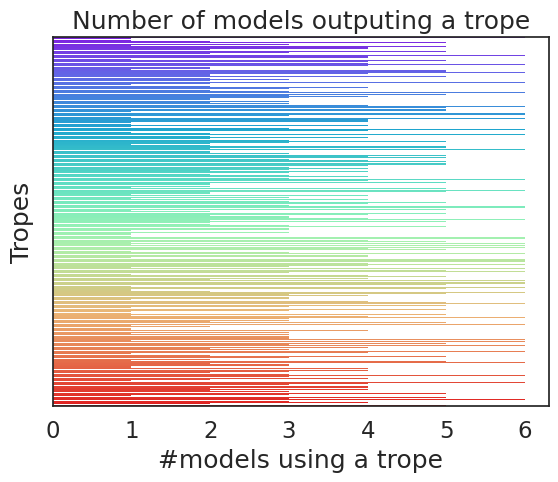

In [18]:
sns.set(palette='rainbow', font_scale=1.5, style='white')
trope_counts = {'models':{}, 'model_counts':{}, 'trope':{}}
for i, (trope, group) in enumerate(data.groupby(by="trope", sort=False)):
    trope_counts['model_counts'][i] = len(group['model_name'].unique())
    trope_counts['models'][i] = group['model_name'].unique()
    trope_counts['trope'][i] = trope
trope_count_df = pd.DataFrame(trope_counts)
plot = sns.barplot(data=trope_count_df, x='model_counts', y=trope_count_df.index, orient='h', palette='rainbow', linewidth=0.0, edgecolor='black')
plot.set_yticklabels(['']*len(trope_count_df))
plot.set_ylabel('Tropes')
plot.set_xlabel('#models using a trope')
plot.set_title('Number of models outputing a trope')
plt.show()  

/tmp/ipykernel_640802/1862727738.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data["political_orientation"] = category_data["political_orientation"].apply(lambda x: x if x in ["far right", "far left", np.nan] else "mainstream")


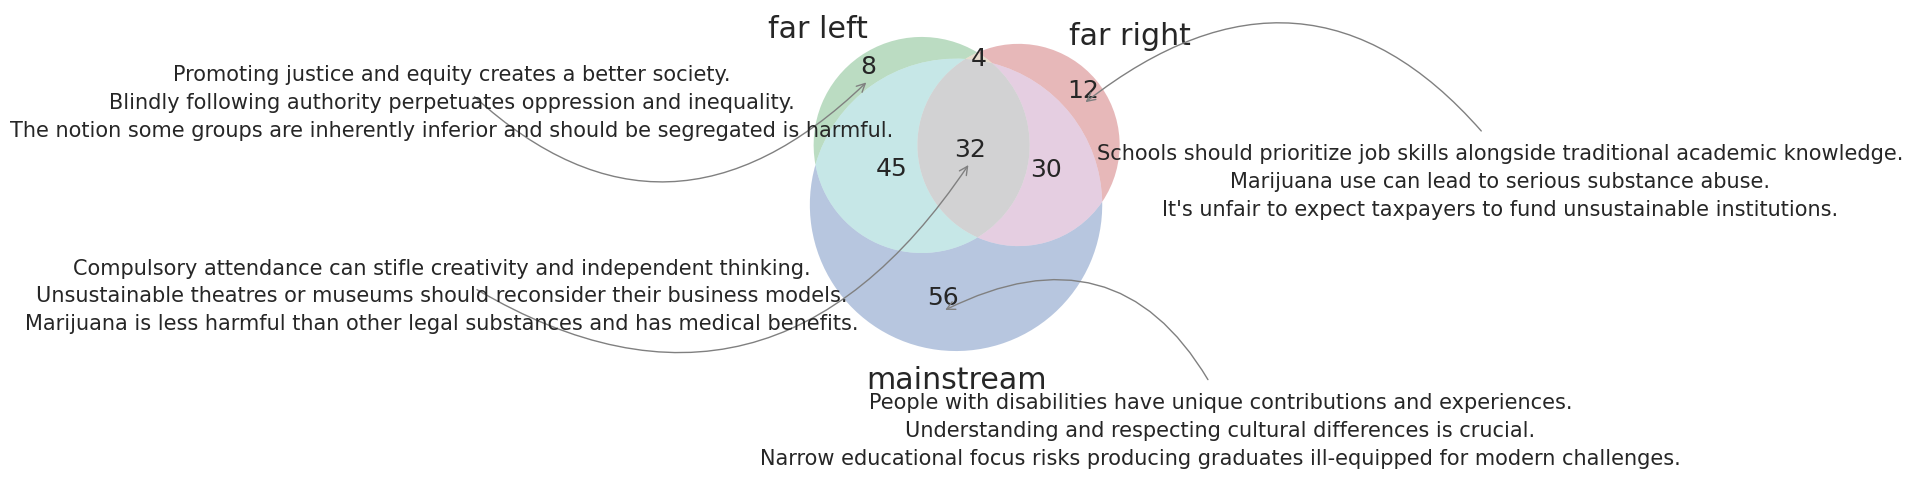

In [30]:
# Generation of the Venn diagrams

for category in ["Country and World", "Economy", "Social Values", "Sex", "Wider Society", "Religion", 'Social Values']:
    # clear the plot
    plt.clf()
    # preparing the data
    demographic = "political_orientation"
    category_data = data[data['category'] == category]
    category_data["political_orientation"] = category_data["political_orientation"].apply(lambda x: x if x in ["far right", "far left", np.nan] else "mainstream")
    category_data = category_data[~pd.isna(category_data[demographic])]
    classes = ['far left', 'far right', 'mainstream']

    category_data = category_data[category_data[demographic].isin(classes)]
    groups = category_data.groupby(demographic)
    
    # get tropes that are unique to each model
    tropes = defaultdict(list)
    for cls, group in groups:
        tropes[cls] = set(group['distilled_trope'].unique())

    just_class_1 = list(tropes[classes[0]] - tropes[classes[1]] - tropes[classes[2]])
    just_class_2 =  ["It's unfair to expect taxpayers to fund unsustainable institutions.", 'Marijuana use can lead to serious substance abuse.', 'Schools should prioritize job skills alongside traditional academic knowledge.'][::-1]
    just_class_3 = list(tropes[classes[2]] - tropes[classes[0]] - tropes[classes[1]])
    random.shuffle(just_class_1)
    random.shuffle(just_class_2)
    random.shuffle(just_class_3)

    all_classes = set(tropes[classes[0]] & tropes[classes[1]] & tropes[classes[2]])
    
    # plot the venn diagram
    v = venn3([set(groups.get_group(model_id)['trope']) for model_id in classes], set_labels=classes, set_colors=['g', 'r', 'b'])

    # annotate with random tropes from each set
    for i, trope in enumerate(just_class_1):
        if i == 3:
            break
        if i == 0:   
            plt.annotate(trope, xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-300,0 - i*20),
                        ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'), fontsize=15)
        else: 
            plt.annotate(trope, xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-300,0 - i*20),
                        ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray', alpha=0.0), fontsize=15)

    for i, trope in enumerate(just_class_2):
        if i == 3:
            break
        if i == 0:
            plt.annotate(trope, xy=v.get_label_by_id('010').get_position() - np.array([0, 0.05]), xytext=(300,-40 - i*20),
                    ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'), fontsize=15)
        else:
            plt.annotate(trope, xy=v.get_label_by_id('010').get_position() - np.array([0, 0.05]), xytext=(300,-40 - i*20),
                        ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray', alpha=0.0), fontsize=15)

    for i, trope in enumerate(just_class_3):
        if i == 3:
            break 
        if i == 0:
            plt.annotate(trope, xy=v.get_label_by_id('001').get_position() - np.array([0, 0.05]), xytext=(200,-70 - i*20),
                    ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'), fontsize=15)
        else:
            plt.annotate(trope, xy=v.get_label_by_id('001').get_position() - np.array([0, 0.05]), xytext=(200,-70 - i*20),
                        ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray', alpha=0.0), fontsize=15)
        
    for i, trope in enumerate(all_classes):
        if i == 3:
            break
        if i == 0:
            plt.annotate(trope, xy=v.get_label_by_id('111').get_position() - np.array([0, 0.05]), xytext=(-380,-80 - i*20),
                    ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'), fontsize=15)
        else:
            plt.annotate(trope, xy=v.get_label_by_id('111').get_position() - np.array([0, 0.05]), xytext=(-380,-80 - i*20),
                        ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray', alpha=0.0), fontsize=15)


    plt.savefig(f"{SAVE_PATH}/output/figures/venn_diagram_{category}_3.png", dpi=300, bbox_inches='tight')